In [2]:
import pandas as pd

df1 = pd.read_csv('Result.csv')

df2 = pd.read_csv('balanced_twitter_btc_big_clean.csv', lineterminator='\n')

In [3]:
df1['label'] = df1['label'].replace({0: 1, 1: -1, 2: 0})

In [4]:
df1.describe(include='all')

,date,text,hard_cleaned_text,label
count,5290,5290,5282,5290.000000
unique,488,5290,5196,NaN
top,2021-06-11,DO NOT MISS this opportunity to mine FREE #cry...,fix,NaN
freq,13,1,7,NaN
mean,NaN,NaN,NaN,0.002836
std,NaN,NaN,NaN,0.210770
min,NaN,NaN,NaN,-1.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,0.000000


In [5]:
df2.describe(include='all')

,date,text,hard_cleaned_text,label
count,3540245,3540245,3540245,3.540245e+06
unique,267,3469981,2789269,NaN
top,2022-01-22,Do you know #BMoney was an idea in 1998 before...,current cardano price alert ada usd bitcoin bt...,NaN
freq,54368,703,17377,NaN
mean,NaN,NaN,NaN,4.198393e-01
std,NaN,NaN,NaN,7.665063e-01
min,NaN,NaN,NaN,-1.000000e+00
25%,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,1.000000e+00


In [6]:
df1['label'].value_counts()

 0    5055
 1     125
-1     110
Name: label, dtype: int64

In [7]:
df2['label'].value_counts()

 1    2095181
 0     836217
-1     608847
Name: label, dtype: int64

In [8]:
# 合并两个数据集
df = pd.concat([df1, df2], ignore_index=True)

In [9]:
df.describe(include='all')

,date,text,hard_cleaned_text,label
count,3545535,3545535,3545527,3.545535e+06
unique,705,3475238,2794455,NaN
top,2022-01-22,Do you know #BMoney was an idea in 1998 before...,current cardano price alert ada usd bitcoin bt...,NaN
freq,54368,703,17377,NaN
mean,NaN,NaN,NaN,4.192171e-01
std,NaN,NaN,NaN,7.661467e-01
min,NaN,NaN,NaN,-1.000000e+00
25%,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,1.000000e+00


In [15]:
df.to_csv('Merged.csv', index=False)

In [10]:
drop_df = df.drop(columns=['text', 'hard_cleaned_text'])

In [11]:
drop_df.describe(include='all')

,date,label
count,3545535,3.545535e+06
unique,705,NaN
top,2022-01-22,NaN
freq,54368,NaN
mean,NaN,4.192171e-01
std,NaN,7.661467e-01
min,NaN,-1.000000e+00
25%,NaN,0.000000e+00
50%,NaN,1.000000e+00
75%,NaN,1.000000e+00


In [12]:
emotion_scores = drop_df.groupby('date')['label'].mean().reset_index()
emotion_scores

,date,label
0,2021-02-05,0.355109
1,2021-02-06,0.371441
2,2021-02-07,0.404031
3,2021-02-08,0.432709
4,2021-02-09,0.373221
...,...,...
700,2023-01-06,0.310392
701,2023-01-07,0.294823
702,2023-01-08,0.299228
703,2023-01-09,0.312214


In [13]:
emotion_scores.to_csv('emotion_scores.csv', index=False)

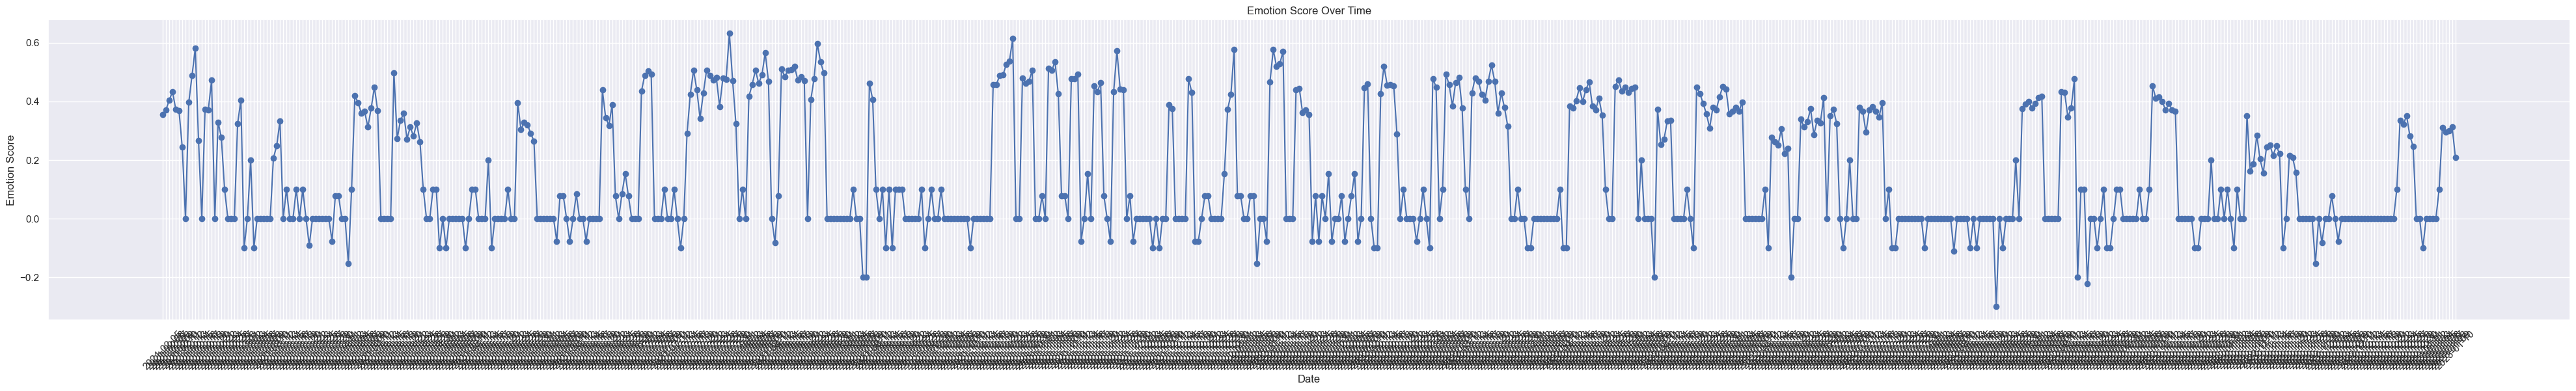

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 6))
plt.plot(emotion_scores['date'], emotion_scores['label'], marker='o', color='b')
plt.title('Emotion Score Over Time')
plt.xlabel('Date')
plt.ylabel('Emotion Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotating the date labels for better readability
plt.show()

In [15]:
close_data = pd.read_csv('btcusdt_1d.csv')

In [16]:

column_names = [
    'date', '开盘价', '最高价', '最低价', 'close',
    '成交量', '收盘时间', '成交额', '成交笔数',
    '主动买入成交量', '主动买入成交额', '忽略该参数'
]
close_data.columns = column_names

# 仅保留开盘时间和收盘价
close_data = close_data[['date', 'close']]

In [17]:
close_data.describe(include='all')

,date,close
count,705,705.000000
unique,705,NaN
top,2021/2/5,NaN
freq,1,NaN
mean,NaN,37644.601830
std,NaN,14287.688925
min,NaN,15780.000000
25%,NaN,21652.490000
50%,NaN,39134.750000
75%,NaN,48298.240000


In [18]:
# 将日期列转换为统一的格式
emotion_scores['date'] = pd.to_datetime(emotion_scores['date'], format='%Y-%m-%d')
close_data['date'] = pd.to_datetime(close_data['date'], format='%Y/%m/%d')
merged_df = pd.merge(emotion_scores, close_data, on='date')

In [19]:
merged_df.describe(include='all')

/var/folders/n7/7084b4k93jb_r5psql_6_sjh0000gn/T/ipykernel_14103/3038795490.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df.describe(include='all')


,date,label,close
count,705,705.000000,705.000000
unique,705,NaN,NaN
top,2021-02-05 00:00:00,NaN,NaN
freq,1,NaN,NaN
first,2021-02-05 00:00:00,NaN,NaN
last,2023-01-10 00:00:00,NaN,NaN
mean,NaN,0.151983,37644.601830
std,NaN,0.205837,14287.688925
min,NaN,-0.300000,15780.000000
25%,NaN,0.000000,21652.490000


In [20]:
merged_df.to_csv('merged_df.csv', index=False)

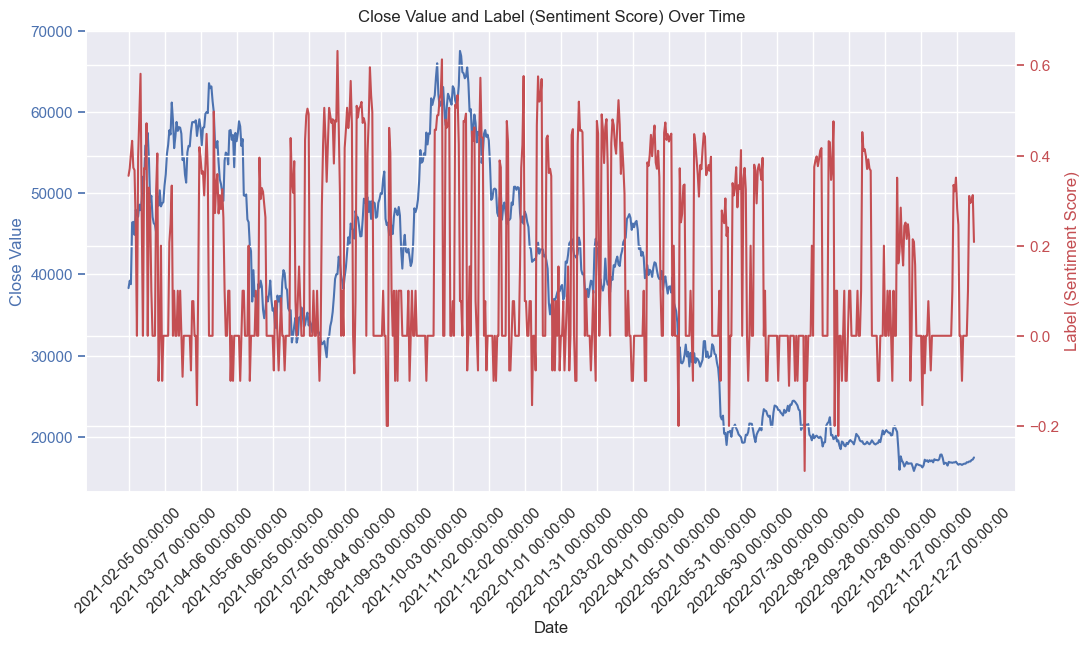

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 close 值
ax1.plot(merged_df['date'], merged_df['close'], color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(merged_df['date'][::30])  # 每30天显示一次日期
ax1.set_xticklabels(merged_df['date'][::30], rotation=45)

# 创建第二个轴
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['label'], color='r')
ax2.set_ylabel('Label (Sentiment Score)', color='r')
ax2.tick_params('y', colors='r')

plt.title('Close Value and Label (Sentiment Score) Over Time')
plt.show()


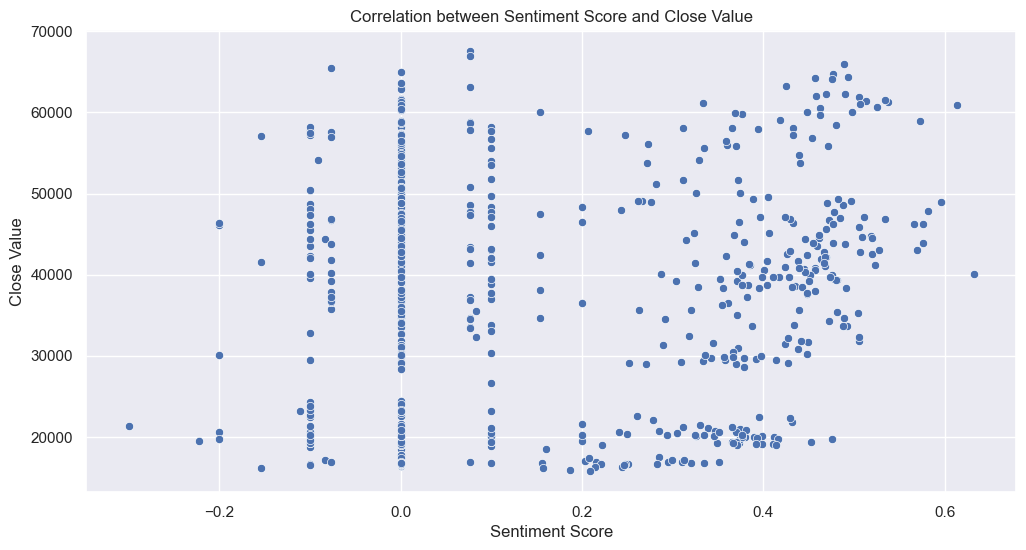

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='label', y='close')
plt.title('Correlation between Sentiment Score and Close Value')
plt.xlabel('Sentiment Score')
plt.ylabel('Close Value')
plt.show()


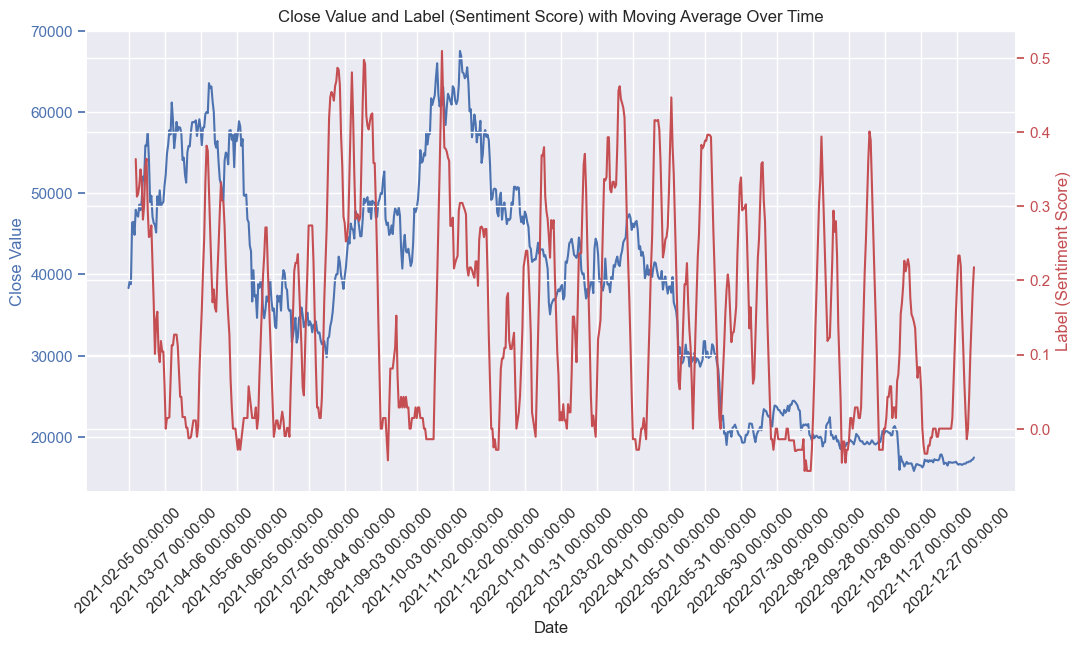

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="darkgrid")

# 计算移动平均，这里假设我们使用30天作为窗口
window_size = 7
merged_df['label_moving_avg'] = merged_df['label'].rolling(window=window_size).mean()

# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 close 值
ax1.plot(merged_df['date'], merged_df['close'], color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Value', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(merged_df['date'][::30])  # 每30天显示一次日期
ax1.set_xticklabels(merged_df['date'][::30], rotation=45)

# 创建第二个轴
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['label_moving_avg'], color='r')  # 移动平均
ax2.set_ylabel('Label (Sentiment Score)', color='r')
ax2.tick_params('y', colors='r')

plt.title('Close Value and Label (Sentiment Score) with Moving Average Over Time')
plt.show()


In [44]:
import numpy as np

data = pd.read_csv('merged_df.csv')

# Convert the 'date' column to datetime format for easy manipulation
data['date'] = pd.to_datetime(data['date'])

# Define different time windows for correlation calculation
time_windows = [7]

# Function to calculate rolling correlation
def calculate_rolling_correlation(df, window):
    """
    Calculates the rolling correlation between 'label' and 'close' columns 
    in the dataframe over a specified window.
    """
    rolling_corr = df['label'].rolling(window=window).corr(df['close'])
    return rolling_corr

# Calculate rolling correlations for each time window
correlations = {}
for window in time_windows:
    correlations[window] = calculate_rolling_correlation(data, window)

# Create a DataFrame for the rolling correlations
corr_df = pd.DataFrame(correlations)
corr_df['date'] = data['date']  # Adding date for reference
corr_df.set_index('date', inplace=True)

# Display a sample of the results
corr_df.tail(10)

,7
date,
2023-01-01,0.688150
2023-01-02,0.302515
2023-01-03,-0.202886
2023-01-04,0.576231
2023-01-05,0.745704
2023-01-06,0.840960
2023-01-07,0.842945
2023-01-08,0.852913
2023-01-09,0.827300


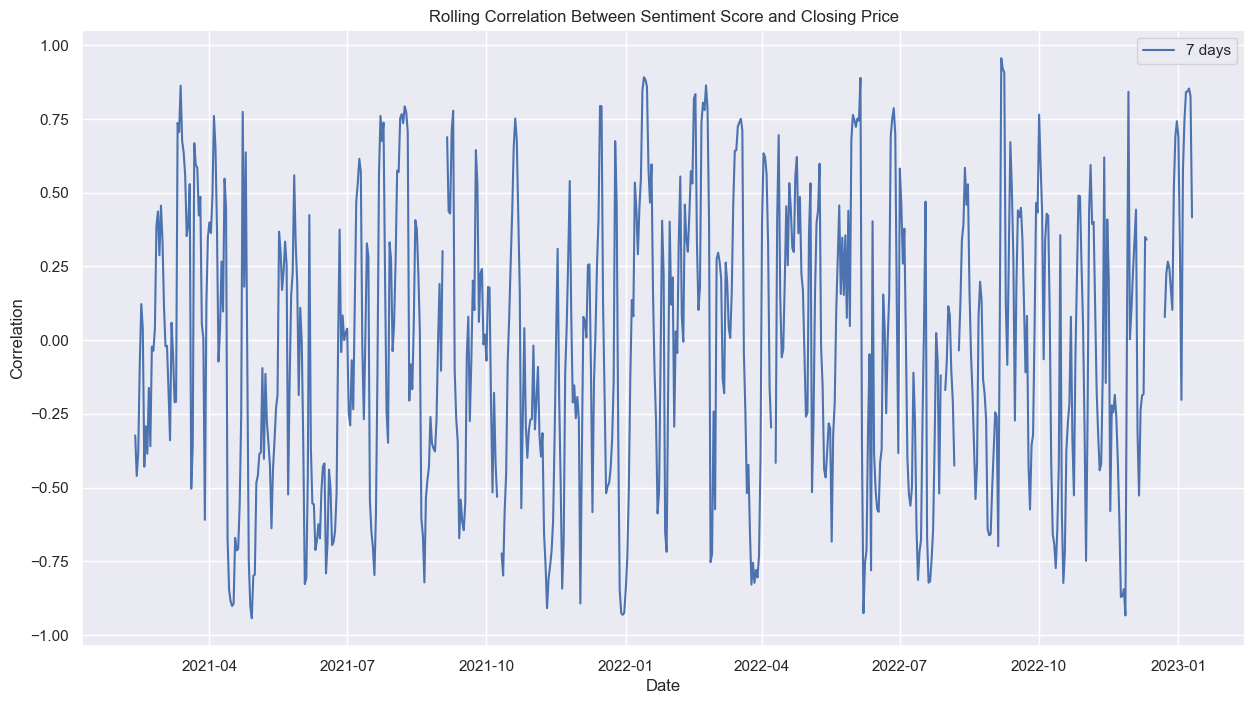

In [45]:
import matplotlib.pyplot as plt

# Plotting the rolling correlations
plt.figure(figsize=(15, 8))

# Plot each time window's correlation
for window in time_windows:
    plt.plot(corr_df.index, corr_df[window], label=f'{window} days')

plt.title('Rolling Correlation Between Sentiment Score and Closing Price')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()
